

SDG 04:

Número de nós: 1227
Número de arestas: 5278
Assortatividade:  0.8236738065273636


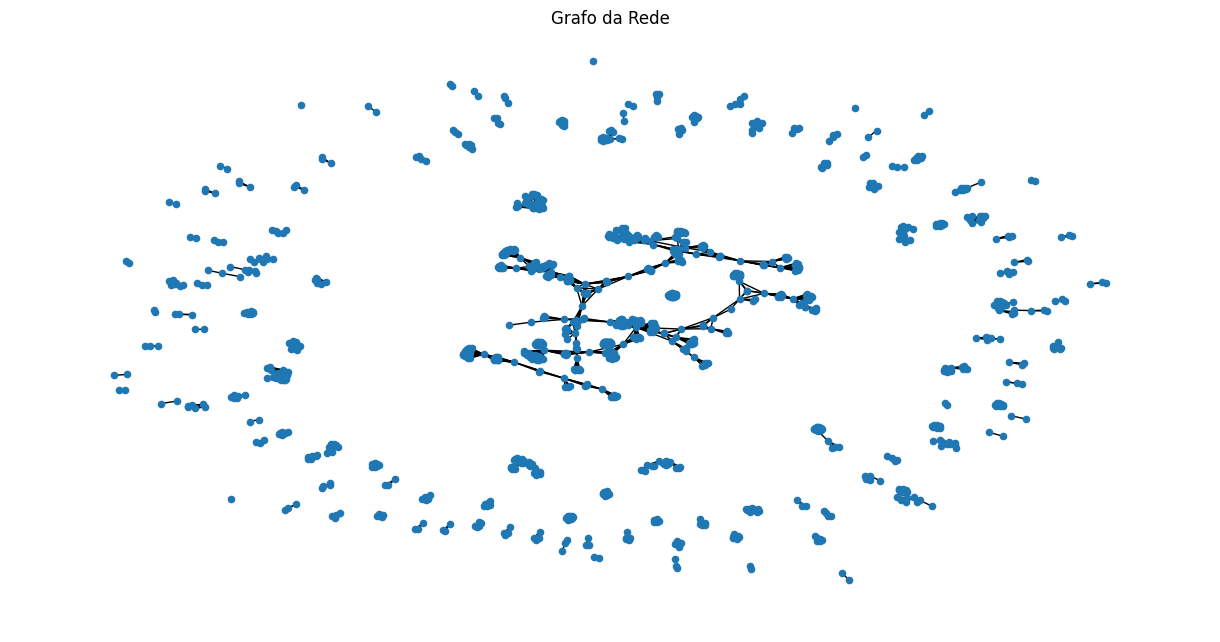

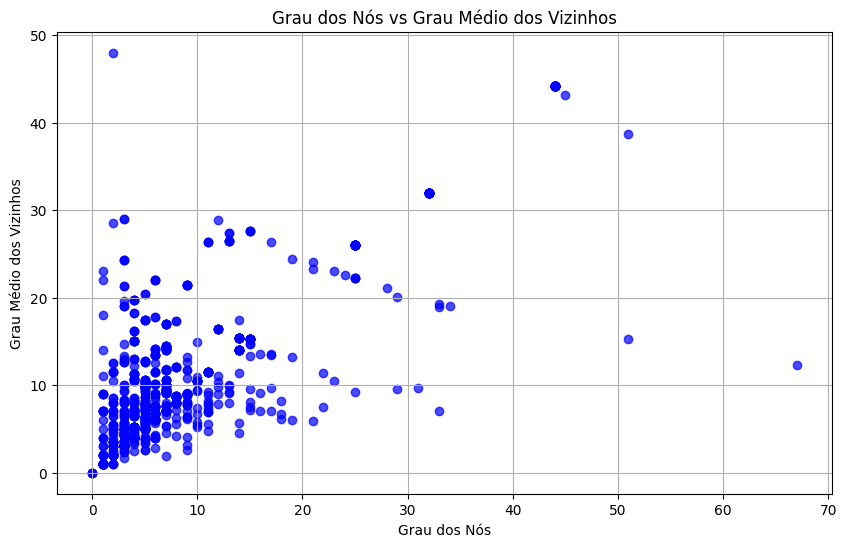



SDG 11:

Número de nós: 1921
Número de arestas: 39383
Assortatividade:  0.997609768519536


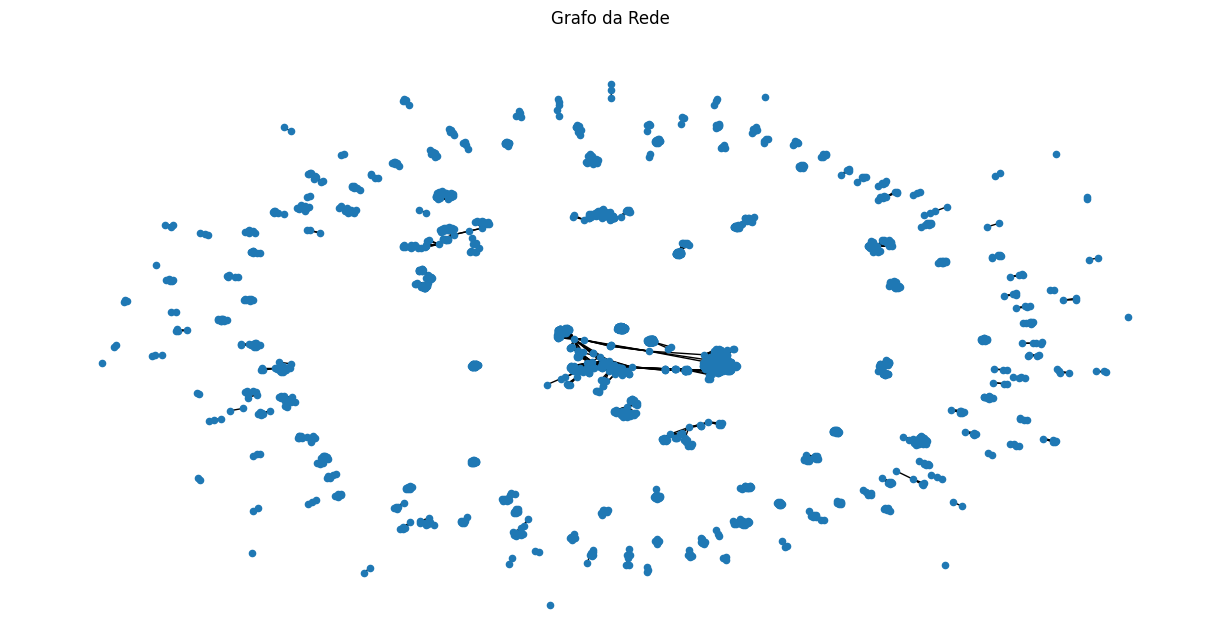

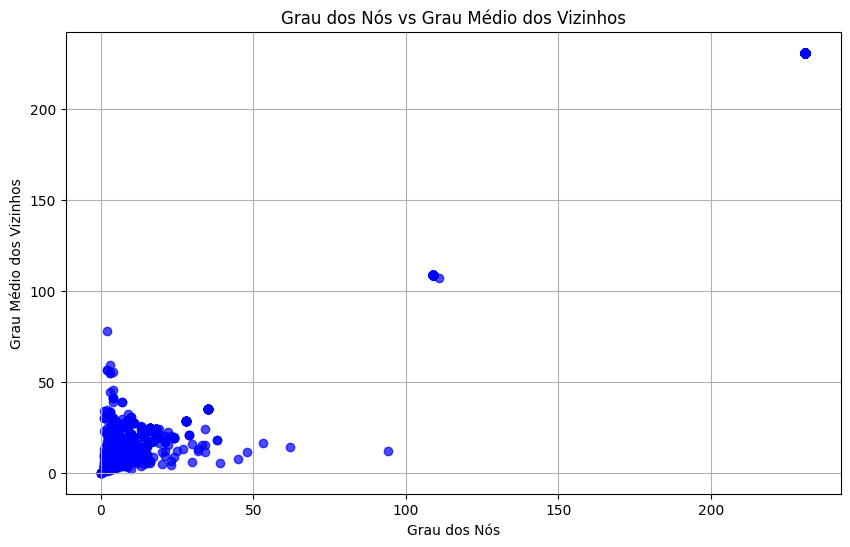



SDG 12:

Número de nós: 1587
Número de arestas: 29938
Assortatividade:  0.9715422500335406


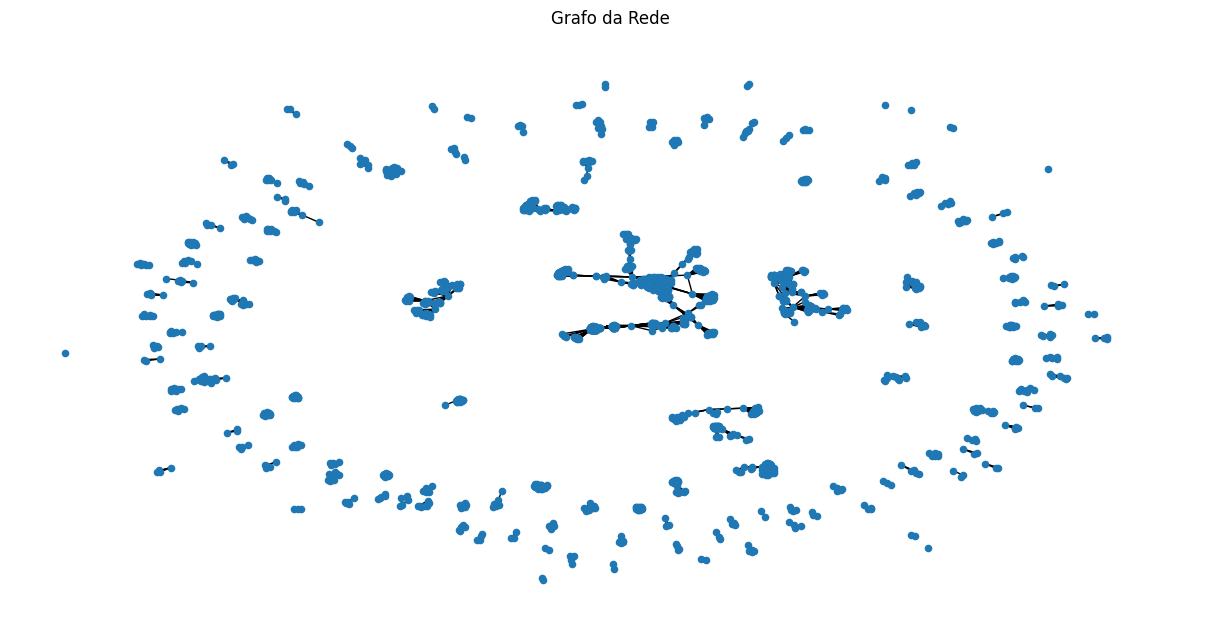

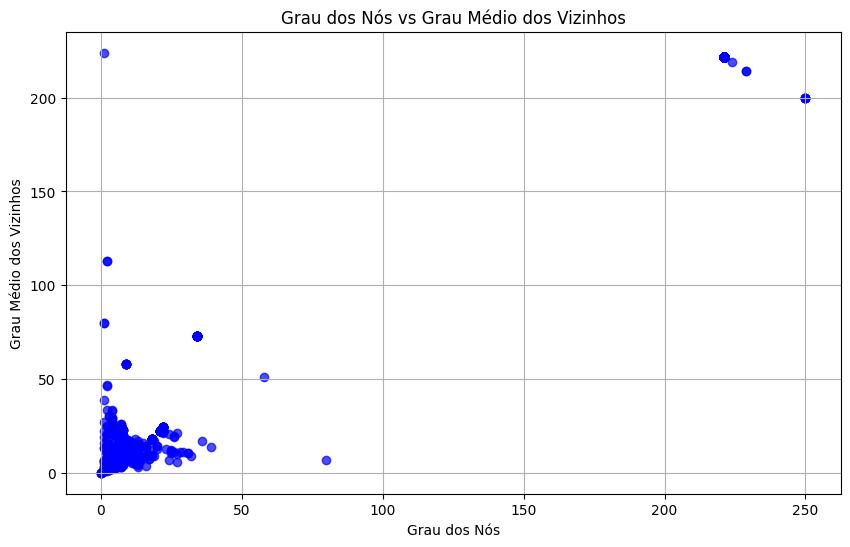



SDG 15:



FileNotFoundError: [Errno 2] No such file or directory: '/content/SDG15.csv'

In [2]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
from networkx.algorithms import bipartite


def montar(num):
  # Carregar o arquivo CSV
  file_path = f'/content/SDG{num}.csv'
  data = pd.read_csv(file_path)


  # Extrair IDs dos autores e suas afiliações
  author_ids = data['Author(s) ID'].str.split('; ')
  affiliations = data['Affiliations'].str.split('; ')

  # Inicializar o grafo
  B = nx.Graph()

  for author_list, affiliation_list in zip(author_ids, affiliations):
      if author_list and affiliation_list:
          # Adicionar nós para cada autor
          for author in author_list:
              B.add_node(author)

          # Criar arestas entre autores que compartilham a mesma afiliação
          for i in range(len(author_list)):
              for j in range(i + 1, len(author_list)):
                  B.add_edge(author_list[i], author_list[j])


  # Exibir informações básicas sobre a rede
  print(f"Número de nós: {B.number_of_nodes()}")
  print(f"Número de arestas: {B.number_of_edges()}")

  # Calcular a assortatividade em relação ao grau dos nós
  assortativity = nx.degree_assortativity_coefficient(B)
  print("Assortatividade: ",assortativity)

  return B


def plotar(B):

  # Calcular o grau dos nós e o grau médio dos vizinhos
  degree = dict(B.degree())
  avg_neighbor_degree = nx.average_neighbor_degree(B)

  # Preparar os dados para o gráfico
  degree_values = list(degree.values())
  avg_neighbor_degree_values = [avg_neighbor_degree[node] for node in B.nodes()]

  # Plotar a rede
  plt.figure(figsize=(12, 6))
  pos = nx.spring_layout(B, seed=42)  # Layout para visualização
  nx.draw(B, pos, with_labels=False, node_size=20, font_size=8)
  plt.title("Grafo da Rede")
  plt.show()

  # Plotar grau dos nós vs grau médio dos vizinhos
  plt.figure(figsize=(10, 6))
  plt.scatter(degree_values, avg_neighbor_degree_values, alpha=0.7, color='blue')
  plt.title("Grau dos Nós vs Grau Médio dos Vizinhos")
  plt.xlabel("Grau dos Nós")
  plt.ylabel("Grau Médio dos Vizinhos")
  plt.grid(True)
  plt.show()



SDGs = ['04','05','11','12']
for num in range(len(SDGs)):
  print(f'\n\nSDG {SDGs[num]}:\n')
  B = montar(SDGs[num])
  plotar(B)
  print('===========================================================================')